# **Diplomado IA: Inteligencia Artificial I - Parte 2**. <br> Práctico 1: Grafo cómputo, inicialización de pesos y funciones activación
---
---

**Profesores:**
- Carlos Aspillaga
- Gabriel Sepúlveda

**Ayudante:**
- Mathias Lambert
---
---

# **Instrucciones Generales**

El siguiente práctico se debe realizar de forma **individual**. El formato de entregar es el **archivo .ipynb con todas las celdas ejecutadas**. Las secciones donde se planteen preguntas de forma explícita deben ser respondida en celdas de texto, y no se aceptará solo el _output_ de una celda de código como respuesta.

**Nombre alumno:** Ariel Carvajal

El siguiente práctico cuanta con 3 secciones donde cada una contendrá 1 o más actividades a realizar. Algunas actividades correspondrán a escribir código y otras a responder preguntas. 

Antes de responder, se recomienda **fuertemente** revisar las secciones previas donde se desarrollan los ejemplos, dado que algunas de las actividades pueden ser completadas reutilizando el mismo código.

**Fecha de entrega:** viernes 17 de septiembre de 2021, 23:59 hrs.

---
**IMPORTANTE:** habrá un bonus de 1 décima para todos aquellos alumnos/as que muestren buen orden en sus respuestas (esto aplica a legibilidad de código, buena redacción, formalidad, organización del jupyter notebook, seguimiento de instrucciones, etc). El criterio lo pondrá cada ayudante corrector. La nota máxima obtenible en el laboratorio es 7.0

# **Índice**

**Diplomado IA: Inteligencia Artificial I - Parte 2.  Práctico 1: Grafo cómputo, inicialización de pesos y funciones activación**

[Grafos de Cómputo](#scrollTo=Y653wzAj2ZhO)

>[Experimento 1: Construcción de grafo de cómputo para entrenamiento de perceptrón](#scrollTo=-WbabEUqkbId)

>[Experimento 2: Construcción de grafo de cómputo de alto nivel](#scrollTo=_qm9c16LmhxR)

>[Experimento 3: ¿ Cómo entrenar nuestro perceptrón en pytorch ?](#scrollTo=DVUgM5taN_R2)

>[Actividades (opcional)](#scrollTo=19knwwdcZKo3)

>>[Actividad 1.1 (opcional)](#scrollTo=oILMcIAhnP-C)

[Funciones de Activación](#scrollTo=kZWTbXiJ2qnE)

>[Experimento 1: Explorando y visualizando las funciones de activación](#scrollTo=NO2-omLG25ZB)

>>[Actividad 2.1](#scrollTo=g-Y2h_iAjBqi)

>>[Actividad 2.2](#scrollTo=S_BhTrrQlLOt)

>[Experimento 2: Evolución de parámetros según función de activación](#scrollTo=sVd8UUyy1OUy)

>>[Actividad 2.3](#scrollTo=F6R9-xepUBxi)

>>[Actividad 2.4](#scrollTo=1Rtsp7KYWDZv)

[Inicialización de Pesos](#scrollTo=Gch1aN5l60Yo)

>[Experimento 1: Inicialización con valor constante](#scrollTo=c4DPyT3m64-w)

>>[Inicialización de pesos con valores menor a 1](#scrollTo=ZbxLQ3iZswW0)

>>[Inicialización de pesos con valores mayor a 1](#scrollTo=4zzY7EAy8cV1)

>[Actividades (opcional)](#scrollTo=aSZ6LkFc3z_D)

>>[Actividad 3.1](#scrollTo=X7LBCq8zdQwP)

>>[Actividad 3.2](#scrollTo=Mr6SxpSo77kn)



# **Grafos de Cómputo**

En esta sección implementaremos las estructuras de datos que nos permitirán calcular el valor del gradiente en cada neurona dentro de una red neuronal, y a través de ellos, aplicar una actualización de los parámetros de la red. Este procedimiento es conocido como *Backpropagation*.

Las estructuras de datos mencionadas representarán a cada una de las operaciones matemáticas aplicadas, y serán construidas a partir del grafo de cómputo que caracteriza la red.

## Experimento 1: Construcción de grafo de cómputo para entrenamiento de perceptrón

Para comenzar con un ejemplo sencillo, consideraremos la estructura fundamental de redes neuronales conocida como Perceptrón. En la siguiente figura, se puede ver un Perceptrón con función de activación sigmoidal junto a las ecuaciones que lo modelan:

<table>
  <tr>
    <td>
      <img src='https://imgur.com/AbVPpPQ.png'/>
    </td>
    <td>
$\LARGE s = \sigma( x \cdot w_{0} + y \cdot w_{1} + w_{2} )$

\\

$donde:$

$\LARGE \sigma(x) = \frac{1}{1+e^{-x}}$
    </td>
  </tr>
</table>

Para poder entrenar nuestro perceptrón de forma supervisada (o cualquier otro modelo), lo primero que necesitamos es contar con un conjunto de datos (dataset) que nos informen acerca de la relación entrada/salida que deseamos *aprender*, tal como la tabla que se muestra a continuación:

<table>
  <tr>
    <td align="center"><b>Entrada</b><br>$\vec{x}$</td>
    <td align="center"><b>Salida Ideal<br>target</b></td>
  </tr>
  <tr>
    <td align="center">$\vec{x}_{0}$</td>
    <td align="center">$t{0}$</td>
  </tr>
  <tr>
    <td align="center">$\vec{x}_{1}$</td>
    <td align="center">$t{1}$</td>
  </tr>
  <tr>
    <td align="center">...</td>
    <td align="center">...</td>
  </tr>
  <tr>
    <td align="center">$\vec{x}_{0}$</td>
    <td align="center">$t{0}$</td>
  </tr>
</table>

Para poder aprender la relación entrada/salida anteriormente mostrada, luego debemos contar con una función que cuantifique el ***error*** entre el **valor actual** que entrega la red y el **valor deseado** (target), **para cada una de las entradas** (entrada). Esta función es conocida como *función de pérdida* o *Loss Function* (en inglés).

La *Loss Function* recibirá como entrada el valor de salida del perceptrón (model output) calculado a partir de una determinada entrada $\vec{x}$, y el valor de la salida ideal que deseamos obtener para la misma entrada (*target*). Con estos dos valores, la *Loss function* calculará un valor de pérdida (o error) que indicará que tan *parecidas* o *cercanas* son la salida actual con el *target*.



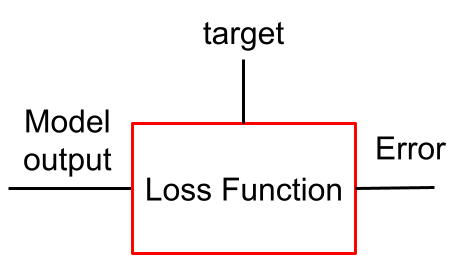

Para el presente laboratorio, utilizaremos la función de pérdida Mean Square Error (MSE), cuya ecuación es presentada a continuación:

$\large MSE Loss = \frac{1}{2} \cdot (model\_output-target)^2$

A partir de lo anteriore, implemenatremos el grafo de cómputo correspondiente de uestro perceptrón más la función de pérdida MSE, tal como se muestra en la siguiente figura:

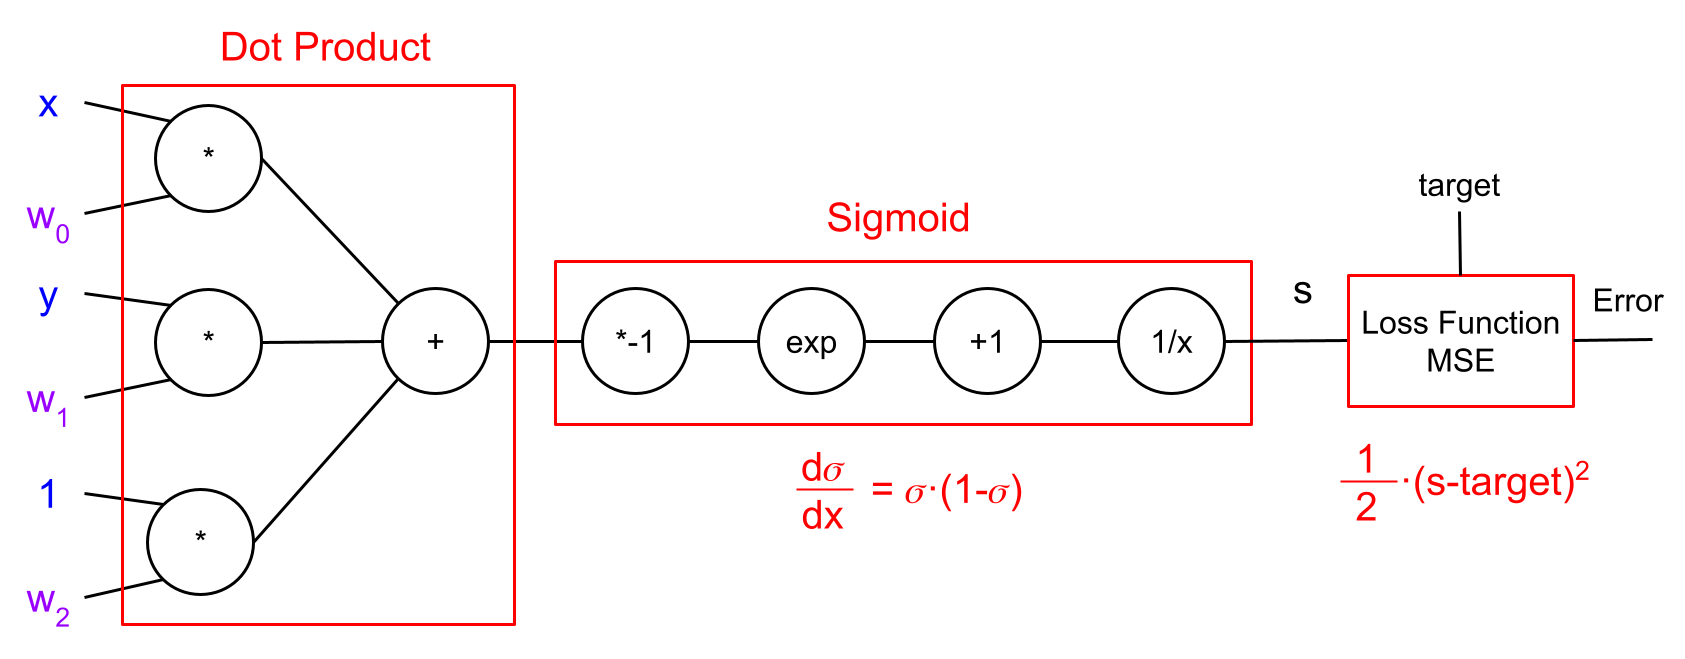

Con el fin de demostrar a bajo nivel como se implementan los grafos de cómputo, **en esta sección no utilizaremos pytorch**. Sin embargo, para facilitar las operaciones vectoriales, nos ayudaremos por la biblioteca *numpy*.

Dado lo anterior, comenzaremos por importar *numpy* y asignandole el alias *np*.

In [1]:
import numpy as np

Como vimos en clases, los grafos de cómputo requieren almacenar los valores de gradiente calculados en el proceso de *Backward*. Para ello, crearemos una clase de nombre *Var* que nos permitirá manejar todas las variables dentro de la red. Esta variable tiene como atributos el valor actual (*value*) y el valor del gradiente (*grad*), los cuales pueden ser escalares o vectores.

In [2]:
class Var(object):
  def __init__(self, value, grad = None):
    self.value = value
    if grad == None:
      self.grad = np.zeros(value.shape)
    else:
      self.grad = grad

A continuación definimos el nodo que permitirá realizar el producto punto entre dos vectores (entrada y pesos), el cual denominaremos *DotProdGate*.

Su método *forward* recibirá como argumento dos vectores, los cuales representarán los operandos de la función. En nuestro caso, uno de ellos será la entrada del perceptrón, y el otro, el vector de pesos que pondera a cada una de ellas. A partir de estos vectores, se calculará el producto punto: multiplicación elemento a elemento, y luego suma.

Por otro lado, el método *backward* calculará el vector de gradientes para los vectores de pesos y entradas. Para ello, multiplicará el gradiente recibido desde el "lado derecho" de la red (z.grad) con el gradiente local del producto punto. Este último puede ser considerado como el valor de la variable *contraria*:

*   Si el gradiente es de x, usaremos el valor de y
*   Si el gradiente es de y, usaremos el valor de x



In [3]:
class DotProdGate(object):
  def __init__(self):
    self.x = None
    self.y = None
    self.z = None
  def forward(self, x, y):
    self.x = x
    self.y = y
    self.z = Var(self.x.value.dot(self.y.value), 0.0)
    return self.z
  def backward(self):
    self.x.grad += self.y.value * self.z.grad
    self.y.grad += self.x.value * self.z.grad

A continuación, crearemos el tercer nodo bajo el nombre de SigmoidGate, el cual tendrá como objetivo implementar la función sigmoide. En sus atributos, almacenará el argumento recibido (x) y el valor resultante (z). Estos 2 atributos deberán ser del tipo *Var* anteriormente definido.

Al igual que la clase anterior, esta clase implementa los métodos *forward* y *backward*. El primero de ellos hará el "paso adelante" de los datos, evaluando el argumento en la función sigmoide y retornando el valor resultante. El segundo, hará el "paso hacia atrás" de los datos calculando el gradiente de la variable x. Como vimos en clases, la derivada local de la sigmoide puede ser calculada en términos de su salida mediante la expresión s * (1-s). Por esta razón, calculamos el gradiente local a partir del valor de z (salida), y luego, multiplicamos por el producto de gradientes que vienen desde el final de la red, siguiendo la lógica de la regla de la cadena.

In [4]:
class SigmoidGate( object ):
  def __init__(self):
    self.x = None
    self.z = None
  def sigmoid(x):
    return 1/(1+np.exp(-x))
  def forward(self, x):
    self.x = x
    self.z = Var(SigmoidGate.sigmoid(self.x.value), 0.0)
    return self.z
  def backward(self):
    s = self.z.value
    self.x.grad += s * (1-s) * self.z.grad

A continuación, crearemos un nodo denominado LossGate, el cual tendrá como objetivo implementar la función que calcula el error entre la salida actual de la red y el valor deseado. En sus atributos, almacenará los argumentos recibidos (x e y) y el valor resultante (z). Estos 3 atributos deberán ser del tipo *Var* anteriormente definido.

Una vez más, esta clase implementa los métodos *forward* y *backward*. El primero de ellos hará el *paso adelante* de los datos, evaluando los argumentos en la función *Mean Square Error* y retornando el valor resultante. El segundo, hará el *paso hacia atrás* de los datos calculando el gradiente de las variables x e y. En este caso, la derivada local corrsponde a las derivadas parciales de la función MSE con respectoa x e y. La primera de ellas corresponde a (x - y), y la segunda a -(x-y). Cada uno de estos gradientes locales es multiplicado por el producto de gradientes que vienen desde el final de la red, siguiendo la lógica de la regla de la cadena.

In [5]:
class LossGate(object):
  def __init__(self):
    self.x = None
    self.y = None
    self.z = None
  def forward(self, x, y):
    self.x = x
    self.y = y
    self.z = Var(0.5*(self.x.value-self.y.value)**2, 0.0)
    return self.z
  def backward(self):
    self.x.grad += (self.x.value-self.y.value) * self.z.grad
    self.y.grad += -1.0*(self.x.value-self.y.value) * self.z.grad

A continuación definiremos los objetos que contendrán las variables y nodos del grafo.

In [6]:
# value and gates definition
w = Var(np.array([2.0,-3.0,-3.0]))
x = Var(np.array([-1.0, -2.0, 1.0]))
t = Var(np.array([0.5]))

dp = DotProdGate()
sg = SigmoidGate()
loss = LossGate()

Para armar la secuencia completa de operaciones que realiza nuestro perceptrón, implementaremos la función forwardNetwork que tomará las variables creadas y las pasará a través de los nodos, retornando a la salida el valor del error.

In [7]:
# forward pass
def forwardNetwork():
  dp_out = dp.forward(w,x)
  p_out = sg.forward(dp_out)
  l = loss.forward(p_out,t)
  return l, p_out

De manera similar, implementaremos la función backwardNetwork que hará el paso inverso desde la función de error hasta los nodos de multiplicación. Note la asignación del valor 1 al gradiente de la variable de error.

In [8]:
# backward pass
def backwardNetwork(output):
  output.grad = 1.0;
  loss.backward()
  sg.backward()
  dp.backward()

A continuación se implementa el loop de entrenamiento mediante el método del descenso del gradiente. Como primer paso, se establece el valor del *learning rate* en 0.01, el cual corresponde al parámetro $\eta$ visto en clases.

Posteriormente, se hace un llamado a la función *forwardNetwork* para hacer el paso hacia adelante, obteniendo como resultado la variable de error y salida del perceptrón. Antes de entrar al loop, se imprime el valor inicial predicho por la red.

Al entrar al loop *while*, se establece como condición de término que el valor del error sea menor o igual a $1^{-4}$, lo cual definirá el grado de precisión que alcanzará nuestro modelo. Una vez dentro del loop, se llama a la función *backwardNetwork* para propagar los gradientes hacia atrás, y luego, se actualizan los pesos de la red según la regla de actualización definida por el método del descenso del gradiente. Luego de esto, se hace un nuevo llamado a la función *forwardNetwork* para pasar los datos hacia adelante y continuar estos pasos de forma iterativa. En cada paso, imprimiremos el valor que va tomando el error.

Finalmente, imprimimos el último valor que predijo el perceptrón durante su entrenamiento, el cual deberá ser cercano al valor objetivo, es decir, cercano a 5.

In [9]:
import time

# gradient descent
learning_rate = 0.01;
e, neuron_output = forwardNetwork()
print( 'First output value: %.4f' % (neuron_output.value) )
while e.value > 1e-4:
  backwardNetwork( e )
  w.value -= learning_rate * w.grad 
  e, neuron_output = forwardNetwork()
  print( 'current loss: %.4f' % (e.value) )
  time.sleep(0.25) # Esta linea solo sirve para ver la evolucion del entrenamiento "lentamente"
print( 'First output value: %.4f' % (neuron_output.value) )

First output value: 0.7311
current loss: 0.0266
current loss: 0.0263
current loss: 0.0260
current loss: 0.0255
current loss: 0.0249
current loss: 0.0241
current loss: 0.0233
current loss: 0.0224
current loss: 0.0213
current loss: 0.0202
current loss: 0.0190
current loss: 0.0177
current loss: 0.0163
current loss: 0.0149
current loss: 0.0135
current loss: 0.0120
current loss: 0.0105
current loss: 0.0091
current loss: 0.0076
current loss: 0.0063
current loss: 0.0050
current loss: 0.0038
current loss: 0.0028
current loss: 0.0019
current loss: 0.0012
current loss: 0.0006
current loss: 0.0002
current loss: 0.0000
First output value: 0.5060


## Experimento 2: ¿ Cómo entrenar nuestro perceptrón en pytorch ?

En este punto cabe preguntarse, ¿ cómo implementaríamos el experimento anterior utilizando pytorch ?.

A continuación se muestra un código de ejemplo para el entrenamiento de un perceptrón bajo las mismas condiciones que el experimento anterior.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

w = torch.Tensor( [2.0,-3.0,-3.0] )
x = torch.Tensor( [-1.0, -2.0] )
t = torch.Tensor( [0.5] )

class Perceptron( nn.Module ):
  def __init__( self, weights ):
    super( Perceptron, self ).__init__()
    self.layer = nn.Linear( 2, 1 )
    with torch.no_grad():
      self.layer.weight.copy_( weights[:2] )
      self.layer.bias.copy_( weights[2] )
    self.sigmoid = nn.Sigmoid()
  def forward( self, x ):
    x = self.sigmoid( self.layer(x) )
    return x

model = Perceptron( w )
mse_loss = nn.MSELoss()
optimizer = optim.SGD( model.parameters(), lr = 0.01 ) # Learning rate equal to 0.01

p = model( x )          # forward step
loss_value = mse_loss( p, t )
print( 'First output value: %.4f' % (p) )
while loss_value.item() > 1e-4:
  loss_value.backward() # backward step
  optimizer.step()      # weights update
  p = model( x )        # forward step
  loss_value = mse_loss( p, t )
  print( 'current loss: %.4f' % (loss_value.item()) )
print( 'Last output value: %.4f' % (p) )

First output value: 0.7311
current loss: 0.0529
current loss: 0.0519
current loss: 0.0504
current loss: 0.0485
current loss: 0.0461
current loss: 0.0433
current loss: 0.0401
current loss: 0.0366
current loss: 0.0328
current loss: 0.0288
current loss: 0.0247
current loss: 0.0205
current loss: 0.0165
current loss: 0.0126
current loss: 0.0090
current loss: 0.0059
current loss: 0.0034
current loss: 0.0015
current loss: 0.0004
current loss: 0.0000
Last output value: 0.4990


## Actividad 1

Utilizando los conceptos y estructuras vistas en el **Experimento 1**, programe y entrene un perceptrón creando un grafo de cómputo con los siguientes nodos:



*   Perceptron (neurona + sigmoide)
*   MSE Loss function


tal como se ve en la siguiente figura:

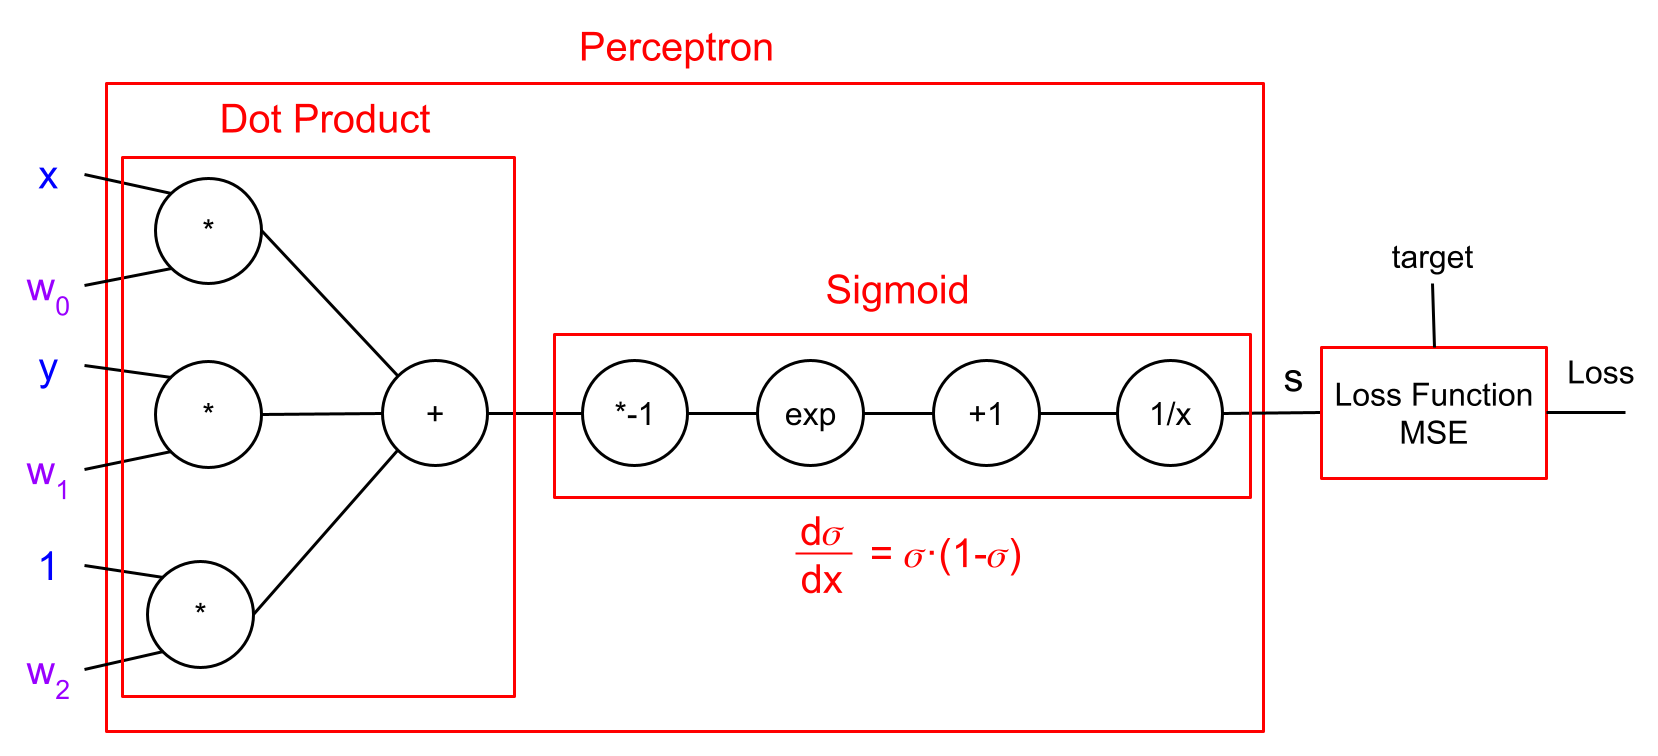

In [11]:
# Inserte aquí su código

# **Funciones de Activación**

## Experimento 1: Explorando y visualizando las funciones de activación

Para esta etapa, vamos a explorar una función de activación, ver que valores posibles puede retornar y que gradientes puede devolver. 

Primero vamos a definir una función de activacion, en este caso la `ReLU` (https://pytorch.org/docs/stable/nn.html#relu).

**Pytorch tip 1:** Para utilizar las funcionalidades de pytorch, debemos como primer paso imporate el paquete torch mediate: *import torch*

**Pytorch tip 2:** Para acceder a las funciones de activación, utilizaremos el módulo torch.nn. Las funciones de activación deberán ser instanciadas como un objeto de la clase en cuestión. Por ejemplo: *torch.nn.ReLU()*.

In [12]:
import torch

activation_function = torch.nn.ReLU()

print(activation_function)

ReLU()


Luego vamos a utilizar dicha funcion para ver cual es la salida ante un valor positivo, el 0 y uno negativo.

**Pytorch tip:** Aquí es importante notar que utilizaremos un tipo de dato Tensor del framework pytorch. Como su nombre lo indica, este tipo de dato permite la creación y manejo de tensores, que son la unidad fundamental para el flujo de las operaciones matemáticas definidas en cualquier arquitectura. En el caso particular del ejemplo, crearemos tendores de 1 dimensión a partir de una lista de python.

In [13]:
x = torch.Tensor([2])
positivo = activation_function(x)
print( 'Función evaluada en un valor positivo: %d' % (positivo))

x = torch.Tensor([0])
cero = activation_function(x)
print( 'Función evaluada en el cero: %d' % (cero))

x = torch.Tensor([-9])
negativo = activation_function(x)
print( 'Función evaluada en un valor negativo: %d' % (negativo))

Función evaluada en un valor positivo: 2
Función evaluada en el cero: 0
Función evaluada en un valor negativo: 0


Ahora vamos a graficar todos los valores posible que puede tomar un valor ente -10 y 10 cuando se le aplica una función de activación.

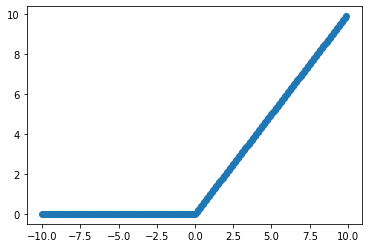

In [14]:
import matplotlib.pyplot as plt

import numpy

X = []
Fx = []

# Recorremos todos los valores entre -10 a 10 con diferencia de 0.1 entre cada valor
for x in numpy.arange(-10, 10, 0.1):
    X.append(x)
    x = torch.Tensor([x])
    result = activation_function(x)
    Fx.append(float(result)) # convert Tensor() to float(), and append it into list

plt.scatter(X, Fx)

plt.show()

Ahora obtendremos el valor del gradiente (derivada) que devuelve la función de activación ReLU en su parte lineal. Para ello utilizaremos el método *backward* sobre el tensor de resultado (salida de ReLU), para iniciar la retro-propagación de los gradientes. El proceso de cálculo que hay detrás de este método, es el mismo analizado para el cálculo de gradientes mediante grafos de cómputo.

**Pytorch tip:** Aquí introduciremos un nuevo tipo de dato llamado *Variable*. Esta clase es simplemente un *wrapper* para de la clase Tensor, que permite mantener en memoria los datos necesarios para el cálculo de los gradientes y la estructura del grafo de cómputo. Para ello, es necesario entregar como argumento el tensor a utilizar, y el parámetro *requires_grad* con valor True. Para efectos operativos, *Variable* se comporta exactamente igual que *Tensor*.

In [15]:
from torch.autograd import Variable

# Definimos el valor de entrada e indicamos que debe almacenar el gradiente
x = Variable(torch.Tensor([2]), requires_grad=True)

result = activation_function(x)

# Aplicamos el paso "backward" para propagar los gradientes
# grad = df/dx * dx/dx
result.backward()

print( 'Función:    %s' % (activation_function))
print( 'Input:      %f' % (x))
print( 'Output:     %f' % (result))
print( 'Gradiente:  %f' % (x.grad))

Función:    ReLU()
Input:      2.000000
Output:     2.000000
Gradiente:  1.000000


Finalmente vamos a graficar todos los gradientes calculados al ingresar valores entre -10 y 10, o en otras palabras, vamos a graficar la derivada de la función de activación para dicho rango.

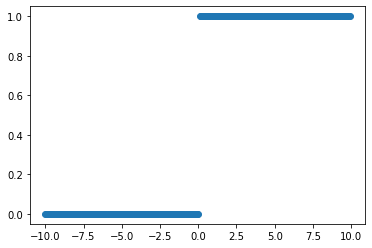

In [16]:
X = []
gradiente = []

# Recorremos todos los valores entre -10 a 10 con diferencia de 0.1 entre cada valor
for x in numpy.arange(-10, 10, 0.1):
    X.append(x)
    x = Variable(torch.Tensor([x]), requires_grad=True)
    result = activation_function(x)
    result.backward()
    gradiente.append(float(x.grad))
    
plt.scatter(X, gradiente)
plt.show()

## Actividad 2.1

En el siguiente link: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity se presenta un conjunto de funciones de activacion. Utilice la función `Sigmoid` para:
1. Confeccionar el gráfico de la función
2. Confeccionar el gráfico de su derivada

In [17]:
# Código para confeccionar el gráfico de la función

In [18]:
# Código para confeccionar el gráfico de su derivada

## Actividad 2.2

Responda la siguiente pregunta.

**1** - Entre un modelo con función de activación ReLU y otro con función de activación Sigmoidal, ¿ Cual cree usted que aprendería más rápido ?. Justifique su respuesta apoyandose en los gráficos generados anteriormente.

**Respuesta**:

Si quedaste con ganas de explorar otras funciones de activacion y visualizar sus derivadas. Recomendamos la siguiente página: https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/

# **Inicialización de Pesos**

En la siguiente sección analizaremos el afecto que tiene el criterio de inicialización de pesos escogido, sobre el proceso de entrenamiento de una red neuronal profunda.

Para ello, crearemos una red neuronal de 10 capas, que recibirá como entrada un vector de 2 dimensiones, y entregará a la salida un único valor. Esta red será construida sin utilizar función de activación en ninguna de sus capas, con el objetivo de medir de forma aislada el efecto de los valores iniciales de los pesos. La siguiente figura, muestra un esquema de la red neuronal diseñada:

<img src="https://imgur.com/O9acV99.png"/>




## Experimento 1: Inicialización con valor constante

Antes de comenzar, importaremos los paquetes necesarios para el desarrollo de esta sección. Con ellos, definiremos la función *plot_variable* que nos permitirá graficar de forma sencilla el valor de los gradientes, y la función *fit*, que implementará el loop de entrenamiento entregando como único valor de entrada el vector $[0.5, 0.5]$, para la predicción del valor 1.

Por ahora, no nos enfocaremos en su implementación.

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [20]:
def plot_variable( grads, varname ):
  plt.figure( figsize=(9, 6) )
  ax = plt.axes()
  ax.set_xlabel( 'Training step' )
  ax.set_ylabel( varname )
  ax.plot( grads )
  ax.update_datalim( list( zip( range(len(grads)), grads ) ) )
  ax.autoscale()

In [21]:
def fit( model ):
  mse_lossfunc = nn.MSELoss()
  optimizer = optim.Adam( model.parameters(), lr = 1e-4 )
  x = torch.Tensor( [0.5, 0.5] )
  y = torch.Tensor( [1] )
  gradients = list()
  loss_seq = list()
  for i in range( 200 ):
    p = model( x )
    loss_value = mse_lossfunc( p, y )
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
    gradients.append( model.layer_0.weight.grad[0,:] )
    loss_seq.append( loss_value.item() )
  gradients = torch.stack( gradients )
  loss_seq = torch.Tensor( loss_seq )
  plot_variable( gradients[:,0], 'Gradient' )
  plot_variable( loss_seq, 'Loss' )

En el siguiente código hemos definido el modelo *DeepNN*. Éste implementa una red neuronal con 9 capas ocultas de 2 neuronas, y una capa de salida de 1 neurona, y sin utilizar función de activación.

Cada capa es definida mediante la creación de un objeto de la clase *Linear* de torch, las cuales son almacenadas dentro de los atributos de nombre *layer_x*. Una vez creadas las 10 capas, utilizaremos la función *init.constant_* de torch para inicializar los pesos de cada capa a un valor constante, el cual es definido por un parámetro del constructor de la clase.

In [22]:
class DeepNN( nn.Module ):

  def __init__( self, weights_initial_value ):
    super( DeepNN, self ).__init__()
    self.layer_0 = torch.nn.Linear( 2, 2 )
    self.layer_1 = torch.nn.Linear( 2, 2 )
    self.layer_2 = torch.nn.Linear( 2, 2 )
    self.layer_3 = torch.nn.Linear( 2, 2 )
    self.layer_4 = torch.nn.Linear( 2, 2 )
    self.layer_5 = torch.nn.Linear( 2, 2 )
    self.layer_6 = torch.nn.Linear( 2, 2 )
    self.layer_7 = torch.nn.Linear( 2, 2 )
    self.layer_8 = torch.nn.Linear( 2, 2 )
    self.layer_9 = torch.nn.Linear( 2, 1 )
    torch.nn.init.constant_( self.layer_0.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_1.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_2.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_3.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_4.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_5.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_6.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_7.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_8.weight.data, weights_initial_value )
    torch.nn.init.constant_( self.layer_9.weight.data, weights_initial_value )

  def forward( self, x ):
    x = self.layer_0(x)
    x = self.layer_1(x)
    x = self.layer_2(x)
    x = self.layer_3(x)
    x = self.layer_4(x)
    x = self.layer_5(x)
    x = self.layer_6(x)
    x = self.layer_7(x)
    x = self.layer_8(x)
    x = self.layer_9(x)
    return x

### Inicialización de pesos con valores menor a 1

Nuestro primer experimento consistirá en iniciazar la red con todos sus pesos con un valor menor que uno. En particular, el valor escogido es 0.1.

In [23]:
model = DeepNN( 0.1 )
print(model.layer_0.weight.data)

tensor([[0.1000, 0.1000],
        [0.1000, 0.1000]])


Ahora, veamos que pasa con los gradientes y la pérdida al entrenar el modelo.

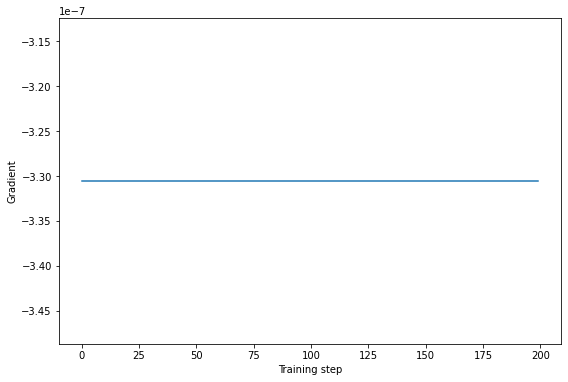

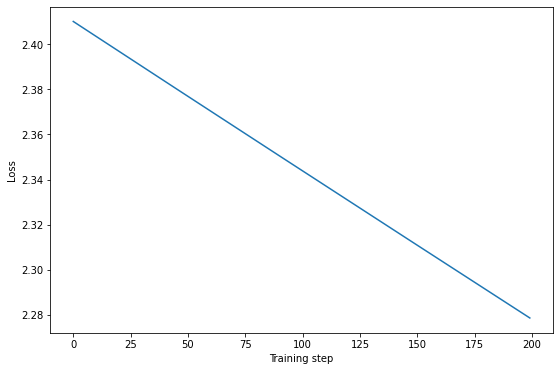

In [24]:
fit(model)

### Inicialización de pesos con valores mayor a 1

En el presente experimento, inicializaremos la red con todos sus pesos con un valor mayor a 1. En particular, el valor escogido es 1.5.

In [25]:
model = DeepNN( 1.5 )
print(model.layer_0.weight.data)

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


Ahora, veamos que pasa con los gradientes y la pérdida al entrenar el modelo.

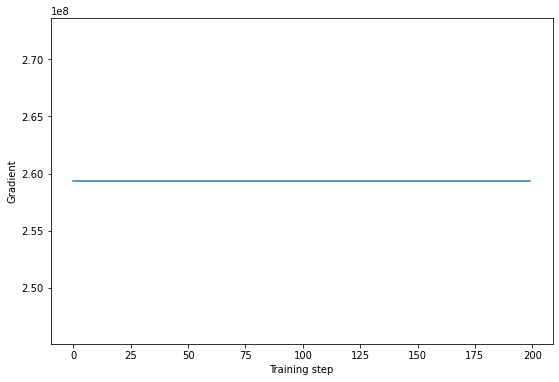

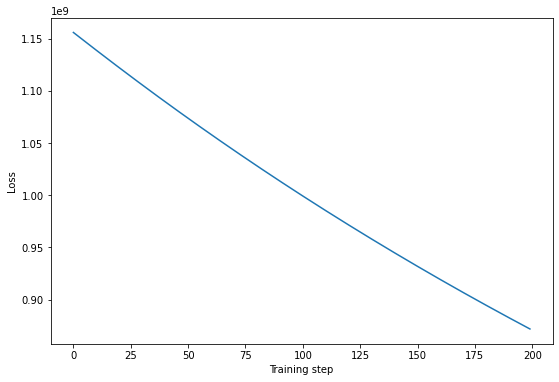

In [26]:
fit(model)

## Actividades

### Actividad 3.1

Responda las siguientes preguntas

¿ Como se llama el fenómeno observado al inicializar los pesos con valores menor a 1 ?

**Respuesta:**

¿ Como se llama el fenómeno observado al inicializar los pesos con valores mayor a 1 ?

**Respuesta:**

### Actividad 3.2

Repita el ejercicio anterior, pero esta vez, incializando los pesos a través del método de Xavier Glorot.

Para ello deberá re-definir el modelo y reemplazar la función de inicialización por la función *torch.nn.init.xavier_uniform_*. Para mayor detalle sobre esta función, visite el sitio: https://pytorch.org/docs/stable/_modules/torch/nn/init.html#xavier_uniform_

In [27]:
# Ingrese el código para el modelo de su red

In [28]:
# Ingrese el código para crear una instancia de su modelo

In [29]:
# Ingrese el código que llama a la función fit, entregando su modelo como parámetro

¿ Qué efecto puede ver de la aplicación de este nuevo método de inicialización de pesos ?

**Respuesta:**

¿ A que se deben los efectos observados ?

**Respuesta:**